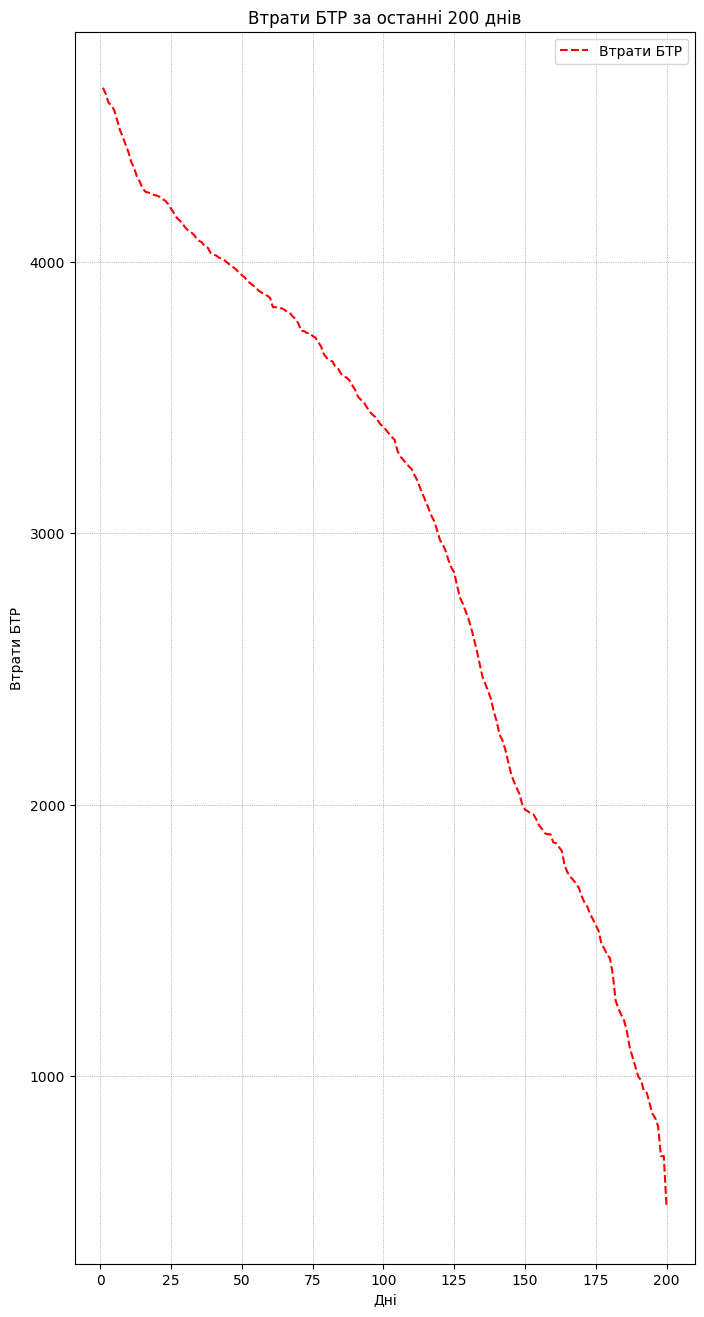

Добові втрати БТР: [ -17  -36  -13 ... -110    0 -190]
5 найбільших добових втрат: [ 0  0  0  0 14]
Знищено БТР влітку 2023 року: 739568
Середнє значення знищених БТР за 100-500 днів: 11927.027431421446


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime

# 1. Функція для отримання numpy-масиву зі значеннями стовпця
def load_column(filename, column_name):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)
        column_index = headers.index(column_name)
        column_data = [row[column_index] for row in reader if row[column_index].isdigit()]
    return np.array(column_data, dtype=int)

# 2. Завантаження значень стовпця "APC"
filename = "russia_losses_equipment.csv"
apc_losses = load_column(filename, "APC")

# 3. Добові втрати БТР
daily_losses = np.diff(apc_losses)

# 4. П’ять найбільших добових втрат
top_5_losses = np.sort(daily_losses)[-5:]

# 5. Знищені БТР влітку 2023 року
def summer_losses(filename, column_name, year, start_date, end_date):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)
        column_index = headers.index(column_name)
        date_index = headers.index("date")
        total_losses = 0
        for row in reader:
            try:
                date = datetime.strptime(row[date_index], "%Y-%m-%d")
                if date.year == year and start_date <= date.month <= end_date:
                    total_losses += int(row[column_index])
            except ValueError:
                continue
        return total_losses

summer_losses_2023 = summer_losses(filename, "APC", 2023, 6, 8)

# 6. Середнє значення знищених БТР за 100-500 днів війни
average_losses = np.mean(apc_losses[100:501])

# 7. Графік втрат БТР за останні 200 днів
last_200_days = apc_losses[-200:]
days = np.arange(1, len(last_200_days) + 1)

plt.figure(figsize=(8, 16), dpi=100)
plt.plot(days, last_200_days, linestyle='--', color='red', label='Втрати БТР')
plt.title("Втрати БТР за останні 200 днів")
plt.xlabel("Дні")
plt.ylabel("Втрати БТР")
plt.legend()
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.savefig("btr_losses.png")
plt.show()

# Вивід результатів
print(f"Добові втрати БТР: {daily_losses}")
print(f"5 найбільших добових втрат: {top_5_losses}")
print(f"Знищено БТР влітку 2023 року: {summer_losses_2023}")
print(f"Середнє значення знищених БТР за 100-500 днів: {average_losses}")
